<a href="https://colab.research.google.com/github/Aryan18k/Stock-Value-Prediction-by-LSTM/blob/master/Copy_of_assign_5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
%matplotlib inline


In [ ]:
tf.__version__

'2.12.0'

In [ ]:
keras.__version__

'2.12.0'

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers

In [ ]:
hidden=model.layers[1]

In [ ]:
weights, biases = hidden.get_weights()

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases.shape

(300,)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
 optimizer="sgd",
 metrics=["accuracy"])


In [ ]:
class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times_cpu = []
        self.times_wall = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.process_time()
        self.epoch_wall_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times_cpu.append(time.process_time() - self.epoch_time_start)
        self.times_wall.append(time.time() - self.epoch_wall_start)

In [ ]:
import time
callbacks=TimeHistory()
cpu_start_time = time.process_time()
wall_start_time = time.time()
history = model.fit(X_train, y_train, epochs=30,
                 validation_data=(X_valid, y_valid), callbacks = [callbacks])
cpu_end_time = time.process_time()
wall_end_time = time.time()

Epoch 1/30
1719/1719 [==============================] - 11s 3ms/step - loss: 0.7145 - accuracy: 0.7637 - val_loss: 0.5187 - val_accuracy: 0.8164
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4876 - accuracy: 0.8304 - val_loss: 0.4645 - val_accuracy: 0.8320
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4440 - accuracy: 0.8438 - val_loss: 0.4250 - val_accuracy: 0.8494
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4177 - accuracy: 0.8524 - val_loss: 0.4211 - val_accuracy: 0.8442
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3974 - accuracy: 0.8611 - val_loss: 0.4011 - val_accuracy: 0.8590
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3814 - accuracy: 0.8664 - val_loss: 0.3840 - val_accuracy: 0.8604
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3667 - accuracy: 0.8714 - val_loss: 0.3909 - val_accuracy

In [ ]:
for i in range(len(callbacks.times_cpu)):
    print("Epoch {}".format(i))
    print("CPU time: {:.2f}s, Wall time: {:.2f}s".format(callbacks.times_cpu[i], callbacks.times_wall[i]))


Epoch 0
CPU time: 8.71s, Wall time: 11.03s
Epoch 1
CPU time: 6.95s, Wall time: 6.05s
Epoch 2
CPU time: 6.84s, Wall time: 5.29s
Epoch 3
CPU time: 6.97s, Wall time: 6.08s
Epoch 4
CPU time: 6.86s, Wall time: 5.35s
Epoch 5
CPU time: 6.91s, Wall time: 6.73s
Epoch 6
CPU time: 6.79s, Wall time: 5.28s
Epoch 7
CPU time: 6.97s, Wall time: 6.01s
Epoch 8
CPU time: 6.73s, Wall time: 5.20s
Epoch 9
CPU time: 6.90s, Wall time: 6.16s
Epoch 10
CPU time: 6.76s, Wall time: 5.28s
Epoch 11
CPU time: 6.93s, Wall time: 6.44s
Epoch 12
CPU time: 6.95s, Wall time: 5.59s
Epoch 13
CPU time: 6.88s, Wall time: 5.79s
Epoch 14
CPU time: 6.88s, Wall time: 5.70s
Epoch 15
CPU time: 6.78s, Wall time: 5.35s
Epoch 16
CPU time: 6.90s, Wall time: 6.04s
Epoch 17
CPU time: 6.74s, Wall time: 5.25s
Epoch 18
CPU time: 6.97s, Wall time: 6.04s
Epoch 19
CPU time: 6.76s, Wall time: 5.31s
Epoch 20
CPU time: 6.84s, Wall time: 5.95s
Epoch 21
CPU time: 6.81s, Wall time: 5.36s
Epoch 22
CPU time: 6.90s, Wall time: 6.03s
Epoch 23
CPU time: 6

Loss and Accuracy vs Epochs


(0.0, 1.0)

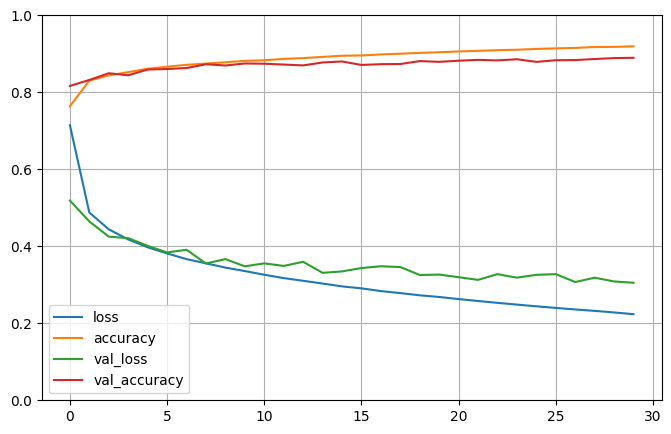

In [ ]:
print("Loss and Accuracy vs Epochs")
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 


In [ ]:
print("The total wall clock time for fit is {:.2f}".format(cpu_end_time-cpu_start_time))
print("The CPU time for fit is {:.2f}".format(wall_end_time-wall_start_time))

The total wall clock time for fit is 209.76
The CPU time for fit is 187.82


In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3251 - accuracy: 0.8854


[0.3250643312931061, 0.8853999972343445]

In [ ]:
y_pred=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_pred_class=[]
for each in y_pred:
    j=np.argmax(each)
    y_pred_class.append(j)

In [ ]:
print("The accuracy score of model for test data is {:.3f} " .format(accuracy_score(y_pred_class,y_test)))

The accuracy score of model for test data is 0.885 


In [ ]:

print("The precision score of model for test data is {:.3f}".format(precision_score(y_pred_class,y_test,average='weighted')))

The precision score of model for test data is 0.887


In [ ]:

print("The recall score of model for test data is {:.3f} " .format(recall_score(y_pred_class,y_test,average='weighted')))

The recall score of model for test data is 0.885 


In [ ]:

conf_matrix=confusion_matrix(y_test,y_pred_class)


In [ ]:
x=conf_matrix.sum(axis=0)
y=conf_matrix.sum(axis=1)
precision=[]
recall=[]
for i in range(0,len(conf_matrix)):
  precision.append(round(conf_matrix[i][i]/x[i],2))
  recall.append(round(conf_matrix[i][i]/y[i],2))
print("Class wise Precision and Recall are")
for i in range(0,len(class_names)):
    print(class_names[i])
    print("Precision is {:.2f}".format(precision[i]))
    print("Recall is {:.2f}".format(recall[i]))

Class wise Precision and Recall are
T-shirt/top
Precision is 0.81
Recall is 0.86
Trouser
Precision is 0.99
Recall is 0.98
Pullover
Precision is 0.84
Recall is 0.76
Dress
Precision is 0.86
Recall is 0.92
Coat
Precision is 0.80
Recall is 0.83
Sandal
Precision is 0.97
Recall is 0.96
Shirt
Precision is 0.73
Recall is 0.68
Sneaker
Precision is 0.93
Recall is 0.95
Bag
Precision is 0.96
Recall is 0.96
Ankle boot
Precision is 0.96
Recall is 0.96


In [ ]:
print("Precision and recall Class wise")
classification_report(y_test,y_pred_class).split("\n")


Precision and recall Class wise


['              precision    recall  f1-score   support',
 '',
 '           0       0.81      0.86      0.83      1000',
 '           1       0.99      0.97      0.98      1000',
 '           2       0.84      0.76      0.80      1000',
 '           3       0.86      0.92      0.89      1000',
 '           4       0.80      0.83      0.81      1000',
 '           5       0.97      0.96      0.96      1000',
 '           6       0.73      0.68      0.70      1000',
 '           7       0.93      0.95      0.94      1000',
 '           8       0.96      0.96      0.96      1000',
 '           9       0.96      0.95      0.96      1000',
 '',
 '    accuracy                           0.89     10000',
 '   macro avg       0.89      0.89      0.88     10000',
 'weighted avg       0.89      0.89      0.88     10000',
 '']

In [ ]:
from functools import partial

DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, padding="same",
                        activation="relu", kernel_initializer="he_normal")
model2= tf.keras.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10, activation="softmax")
])

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 256)        

In [ ]:
model2.layers

In [ ]:
model2.compile(loss="sparse_categorical_crossentropy",
 optimizer="sgd",
 metrics=["accuracy"])


In [ ]:
callbacks=TimeHistory()
cpu_start_time = time.process_time()
wall_start_time = time.time()
history = model2.fit(X_train, y_train, epochs=30,
                 validation_data=(X_valid, y_valid), callbacks = [callbacks])
cpu_end_time = time.process_time()
wall_end_time = time.time()

Epoch 1/30
1719/1719 [==============================] - 19s 7ms/step - loss: 0.9923 - accuracy: 0.6455 - val_loss: 0.4728 - val_accuracy: 0.8256
Epoch 2/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.6088 - accuracy: 0.7858 - val_loss: 0.4134 - val_accuracy: 0.8454
Epoch 3/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.5147 - accuracy: 0.8243 - val_loss: 0.3928 - val_accuracy: 0.8554
Epoch 4/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4548 - accuracy: 0.8460 - val_loss: 0.3450 - val_accuracy: 0.8738
Epoch 5/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4249 - accuracy: 0.8575 - val_loss: 0.3319 - val_accuracy: 0.8760
Epoch 6/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3946 - accuracy: 0.8687 - val_loss: 0.3101 - val_accuracy: 0.8898
Epoch 7/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3680 - accuracy: 0.8760 - val_loss: 0.2949 - val_ac

Loss and Accuracy vs Epochs


(0.0, 1.0)

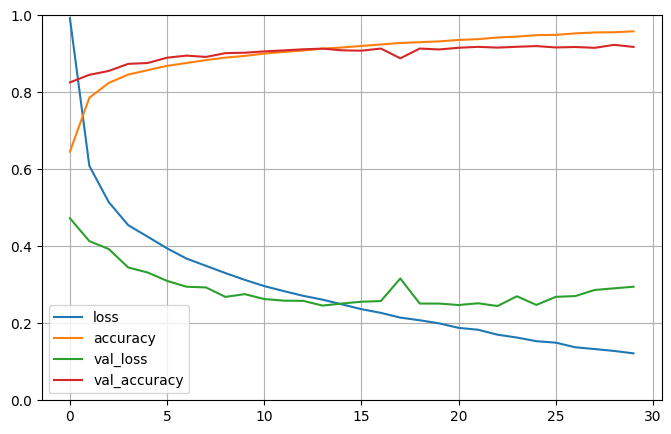

In [ ]:
print("Loss and Accuracy vs Epochs")
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 


In [ ]:
for i in range(len(callbacks.times_cpu)):
    print("Epoch {}".format(i))
    print("CPU time: {:.2f}s, Wall time: {:.2f}s".format(callbacks.times_cpu[i], callbacks.times_wall[i]))

Epoch 0
CPU time: 15.75s, Wall time: 19.45s
Epoch 1
CPU time: 12.26s, Wall time: 11.90s
Epoch 2
CPU time: 12.39s, Wall time: 12.01s
Epoch 3
CPU time: 12.34s, Wall time: 12.08s
Epoch 4
CPU time: 12.44s, Wall time: 12.31s
Epoch 5
CPU time: 12.31s, Wall time: 12.09s
Epoch 6
CPU time: 12.29s, Wall time: 12.23s
Epoch 7
CPU time: 12.33s, Wall time: 12.36s
Epoch 8
CPU time: 12.28s, Wall time: 12.27s
Epoch 9
CPU time: 12.35s, Wall time: 12.30s
Epoch 10
CPU time: 12.26s, Wall time: 12.04s
Epoch 11
CPU time: 12.25s, Wall time: 12.23s
Epoch 12
CPU time: 12.35s, Wall time: 12.09s
Epoch 13
CPU time: 12.30s, Wall time: 12.08s
Epoch 14
CPU time: 12.33s, Wall time: 12.06s
Epoch 15
CPU time: 12.30s, Wall time: 12.26s
Epoch 16
CPU time: 12.33s, Wall time: 12.10s
Epoch 17
CPU time: 12.30s, Wall time: 12.18s
Epoch 18
CPU time: 12.22s, Wall time: 12.19s
Epoch 19
CPU time: 12.35s, Wall time: 12.10s
Epoch 20
CPU time: 12.39s, Wall time: 12.25s
Epoch 21
CPU time: 12.28s, Wall time: 12.05s
Epoch 22
CPU time: 1

In [ ]:
print("The total wall clock time for fit is {:.2f}".format(cpu_end_time-cpu_start_time))
print("The CPU time for fit is {:.2f}".format(wall_end_time-wall_start_time))

The total wall clock time for fit is 372.98
The CPU time for fit is 373.06


In [ ]:
model2.evaluate(X_test,y_test)


313/313 [==============================] - 2s 6ms/step - loss: 0.3021 - accuracy: 0.9188


[0.30207359790802, 0.9187999963760376]

In [ ]:
y_pred=model2.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_pred_class=[]
for each in y_pred:
    j=np.argmax(each)
    y_pred_class.append(j)

In [ ]:
print("The accuracy score of model for test data is {:.3f} " .format(accuracy_score(y_pred_class,y_test)))
print("The precision score of model for test data is {:.3f}".format(precision_score(y_pred_class,y_test,average='weighted')))
print("The recall score of model for test data is {:.3f} " .format(recall_score(y_pred_class,y_test,average='weighted')))
conf_matrix=confusion_matrix(y_test,y_pred_class)

The accuracy score of model for test data is 0.919 
The precision score of model for test data is 0.921
The recall score of model for test data is 0.919 


In [ ]:
conf_matrix=confusion_matrix(y_pred_class,y_test)
x=conf_matrix.sum(axis=0)
y=conf_matrix.sum(axis=1)
precision=[]
recall=[]
for i in range(0,len(conf_matrix)):
  precision.append(round(conf_matrix[i][i]/x[i],2))
  recall.append(round(conf_matrix[i][i]/y[i],2))
print("Class wise Precision and Recall are")
for i in range(0,len(class_names)):
    print(class_names[i])
    print("Precision is {:.2f}".format(precision[i]))
    print("Recall is {:.2f}".format(recall[i]))

Class wise Precision and Recall are
T-shirt/top
Precision is 0.88
Recall is 0.85
Trouser
Precision is 0.98
Recall is 0.99
Pullover
Precision is 0.85
Recall is 0.88
Dress
Precision is 0.93
Recall is 0.90
Coat
Precision is 0.90
Recall is 0.84
Sandal
Precision is 0.98
Recall is 0.98
Shirt
Precision is 0.73
Recall is 0.81
Sneaker
Precision is 0.97
Recall is 0.96
Bag
Precision is 0.99
Recall is 0.98
Ankle boot
Precision is 0.97
Recall is 0.97


In [ ]:
classification_report(y_pred_class,y_test).split("\n")

['              precision    recall  f1-score   support',
 '',
 '           0       0.88      0.85      0.87      1037',
 '           1       0.98      0.99      0.99       990',
 '           2       0.85      0.88      0.87       967',
 '           3       0.93      0.90      0.92      1035',
 '           4       0.90      0.84      0.87      1062',
 '           5       0.98      0.98      0.98       998',
 '           6       0.73      0.81      0.76       900',
 '           7       0.97      0.96      0.97      1013',
 '           8       0.99      0.98      0.99      1004',
 '           9       0.97      0.97      0.97       994',
 '',
 '    accuracy                           0.92     10000',
 '   macro avg       0.92      0.92      0.92     10000',
 'weighted avg       0.92      0.92      0.92     10000',
 '']